In [1]:
from collections import Counter
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

# Paths
DATA_DIR = Path("../data")
IMAGES_DIR = DATA_DIR / "images"
MASKS_DIR = DATA_DIR / "masks"

print(f"Images directory: {IMAGES_DIR}")
print(f"Masks directory: {MASKS_DIR}")

Images directory: ../data/images
Masks directory: ../data/masks


In [2]:
# Dataset Overview
image_files = sorted(list(IMAGES_DIR.glob("*.png")))
mask_files = sorted(list(MASKS_DIR.glob("*.png")))

print(f"Total images: {len(image_files)}")
print(f"Total masks: {len(mask_files)}")
print(f"\nSample filenames:")
for i in range(min(5, len(image_files))):
    print(f"Image: {image_files[i].name}, Mask: {mask_files[i].name}")

Total images: 2211
Total masks: 2211

Sample filenames:
Image: train_0001.png, Mask: train_0001.png
Image: train_0002.png, Mask: train_0002.png
Image: train_0003.png, Mask: train_0003.png
Image: train_0004.png, Mask: train_0004.png
Image: train_0005.png, Mask: train_0005.png


In [3]:
# Image Properties Analysis
def analyze_image(image_path):
    '''Analyze properties of a single image.'''
    img = Image.open(image_path)
    arr = np.array(img)
    return{
        'size': img.size,
        'mode': img.mode,
        'shape': arr.shape,
        'dtype': arr.dtype,
        'min': arr.min(),
        'max': arr.max(),
        'mean': arr.mean(),
        'std': arr.std()
    }

# Analyze first 200 images for statistics
sample_size = min(200, len(image_files))
image_stats = []
mask_stats = []

print("Analyzing sample images...")
for i in range(sample_size):
    image_stats.append(analyze_image(image_files[i]))
    mask_stats.append(analyze_image(mask_files[i]))

Analyzing sample images...


In [4]:
# Display Statistics
img_df = pd.DataFrame(image_stats)
mask_df = pd.DataFrame(mask_stats)

print("=== IMAGE STATISTICS ===")
print(img_df.describe())
print(f"\nImage sizes (unique): {img_df['size'].unique()}")
print(f"Image modes (unique): {img_df['mode'].unique()}")
print(f"Image shapes (unique): {img_df['shape'].unique()}")
print(f"Image dtypes (unique): {img_df['dtype'].unique()}")

print("\n=== MASK STATISTICS ===")
print(mask_df.describe())
print(f"\nMask sizes (unique): {mask_df['size'].unique()}")
print(f"Mask modes (unique): {mask_df['mode'].unique()}")
print(f"Mask shapes (unique): {mask_df['shape'].unique()}")
print(f"Mask dtypes (unique): {mask_df['dtype'].unique()}")



=== IMAGE STATISTICS ===
         min    max        mean         std
count  200.0  200.0  200.000000  200.000000
mean     0.0  255.0   33.424272   59.475005
std      0.0    0.0    5.105580    6.426209
min      0.0  255.0   22.766098   47.636825
25%      0.0  255.0   29.696618   54.286230
50%      0.0  255.0   32.700947   58.938441
75%      0.0  255.0   37.407297   64.044712
max      0.0  255.0   43.280777   73.592857

Image sizes (unique): [(512, 512)]
Image modes (unique): ['L']
Image shapes (unique): [(512, 512)]
Image dtypes (unique): [dtype('uint8')]

=== MASK STATISTICS ===
         min         max        mean         std
count  200.0  200.000000  200.000000  200.000000
mean     0.0    3.080000    0.178031    0.559300
std      0.0    3.333039    0.313541    0.758436
min      0.0    0.000000    0.000000    0.000000
25%      0.0    0.000000    0.000000    0.000000
50%      0.0    1.000000    0.007557    0.088918
75%      0.0    7.000000    0.175662    0.936618
max      0.0    8.0000

In [5]:
# Mask Class Distribution
def get_unique_values(mask_path):
    '''Get unique pixel values in mask.'''
    mask = np.array(Image.open(mask_path))
    return np.unique(mask)

# Analyze all masks for class distribution
print("Analyzing mask class distribution...")
all_unique_values = set()
for mask_file in mask_files:
    all_unique_values.update(get_unique_values(mask_file))

print(f"\nUnique pixel values in masks: {sorted(all_unique_values)}")
print(f"Number of classes: {len(all_unique_values)}")

Analyzing mask class distribution...

Unique pixel values in masks: [np.uint8(0), np.uint8(1), np.uint8(2), np.uint8(3), np.uint8(4), np.uint8(5), np.uint8(6), np.uint8(7), np.uint8(8)]
Number of classes: 9


In [6]:
# Pixel Distribution Analysis
def count_pixels_per_class(mask_path):
    '''Count pixels per class in mask.'''
    mask = np.array(Image.open(mask_path))
    unique, counts = np.unique(mask, return_counts=True)
    return dict(zip(unique, counts))

class_distribution = []
for mask_file in mask_files:
    class_distribution.append(count_pixels_per_class(mask_file))

all_classes = sorted(all_unique_values)
class_pixel_count = {cls: [] for cls in all_classes}

for dist in class_distribution:
    for cls in all_classes:
        class_pixel_count[cls].append(dist.get(cls, 0))

print("\n=== CLASS PIXEL STATISTICS ===")
for cls in all_classes:
    counts = class_pixel_count[cls]
    print(f"Class {cls}:")
    print(f"  Mean pixels: {np.mean(counts):.0f}")
    print(f"  Std pixels: {np.std(counts):.0f}")
    print(f"  Images with this class: {sum(c > 0 for c in counts)}/{len(counts)}")


=== CLASS PIXEL STATISTICS ===
Class 0:
  Mean pixels: 250708
  Std pixels: 16326
  Images with this class: 2211/2211
Class 1:
  Mean pixels: 417
  Std pixels: 560
  Images with this class: 1215/2211
Class 2:
  Mean pixels: 111
  Std pixels: 411
  Images with this class: 228/2211
Class 3:
  Mean pixels: 608
  Std pixels: 1213
  Images with this class: 543/2211
Class 4:
  Mean pixels: 603
  Std pixels: 1233
  Images with this class: 547/2211
Class 5:
  Mean pixels: 6419
  Std pixels: 10509
  Images with this class: 911/2211
Class 6:
  Mean pixels: 295
  Std pixels: 773
  Images with this class: 430/2211
Class 7:
  Mean pixels: 1411
  Std pixels: 3415
  Images with this class: 532/2211
Class 8:
  Mean pixels: 1572
  Std pixels: 3333
  Images with this class: 594/2211


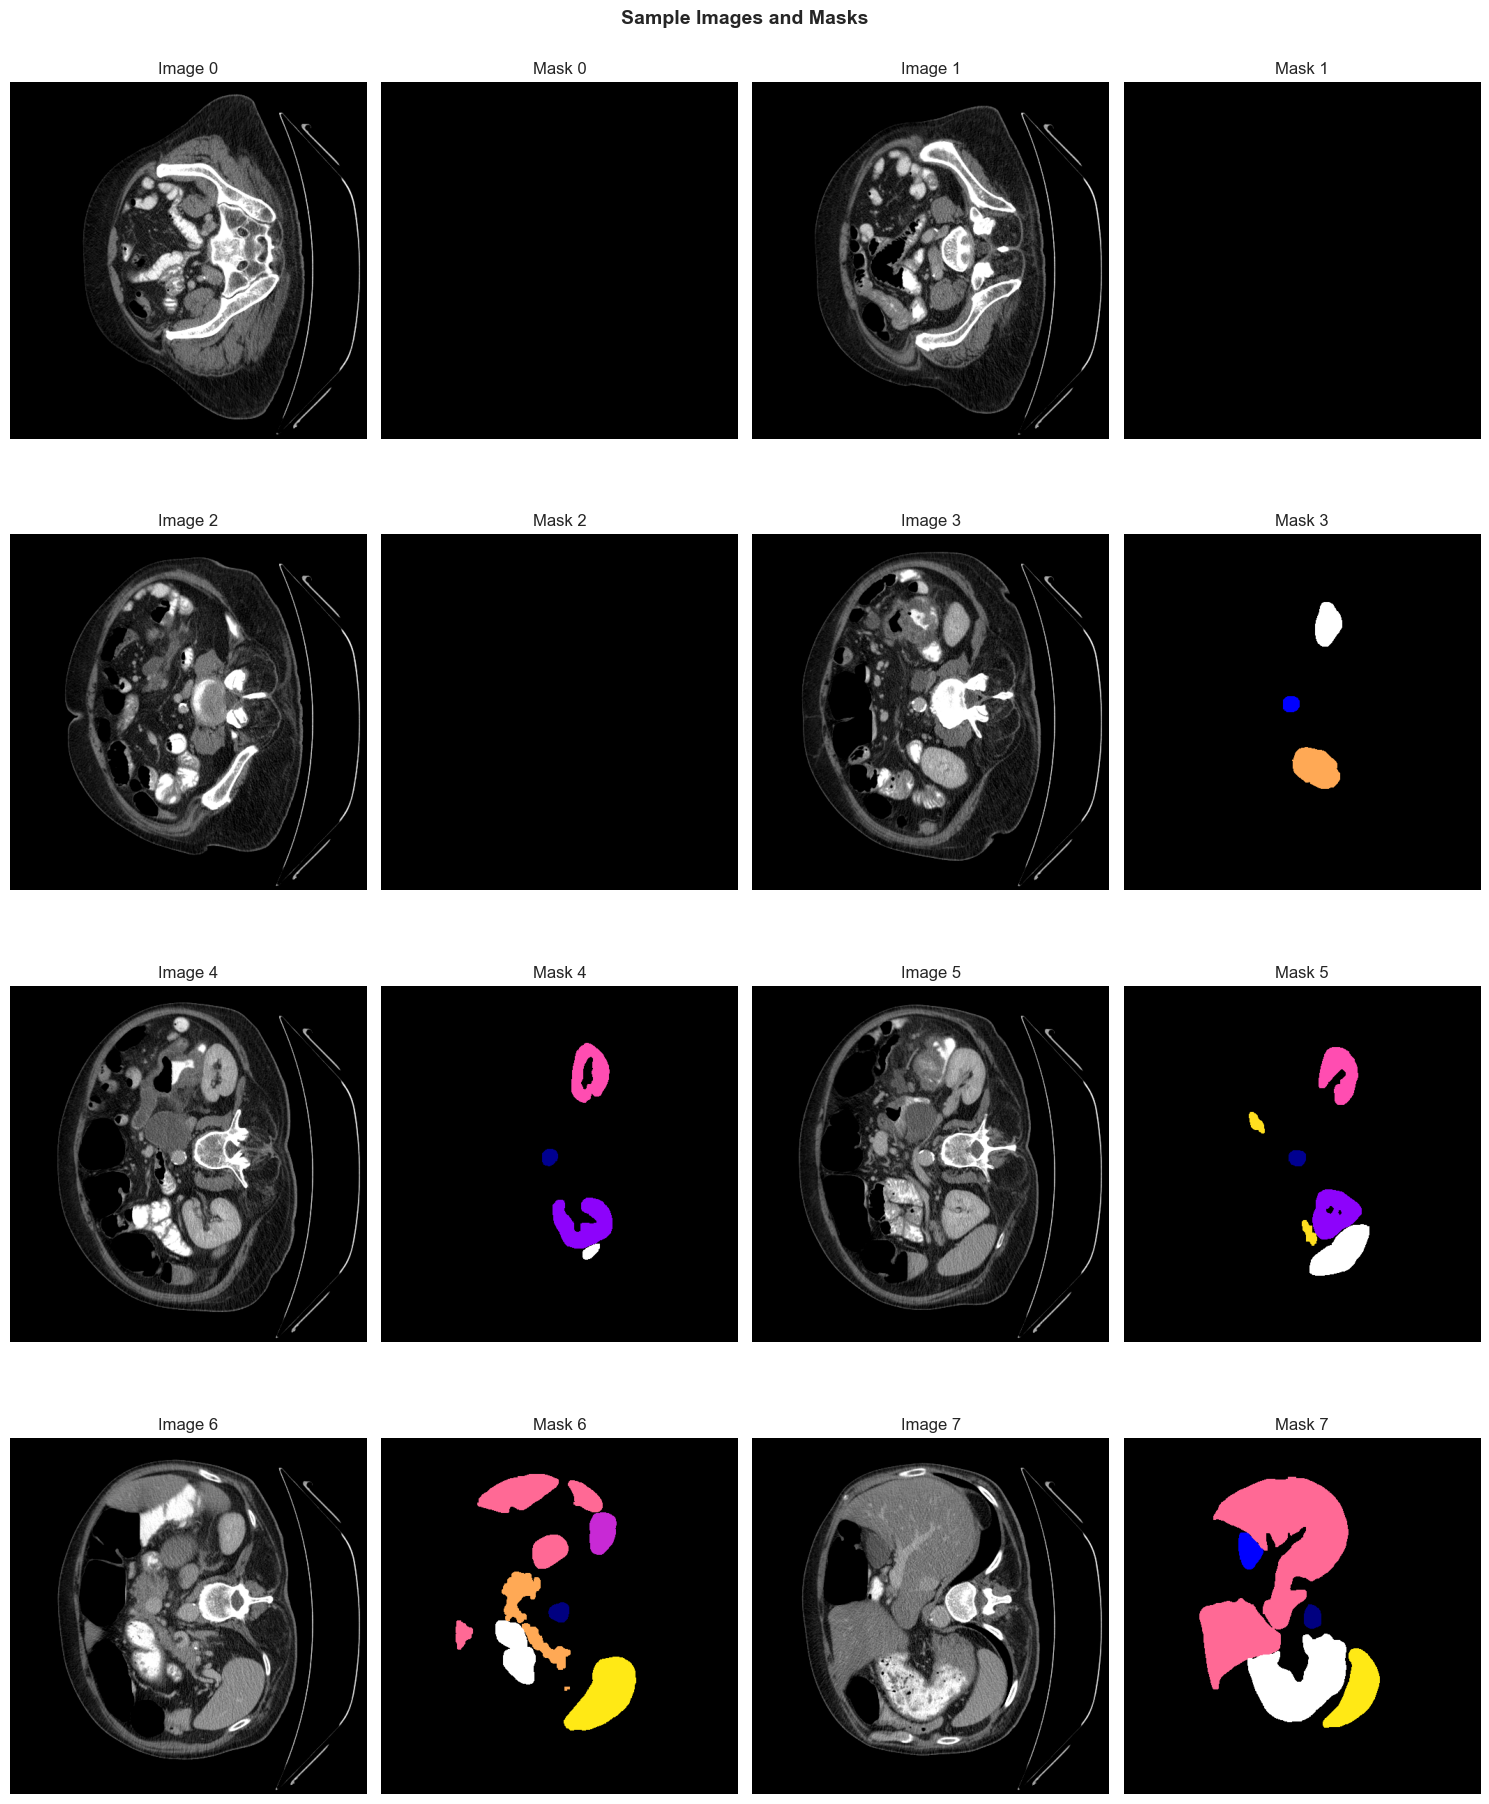

In [7]:
# Visualize sample images and masks
fig, axs = plt.subplots(4, 4, figsize=(15, 19))
fig.suptitle("Sample Images and Masks", fontsize=14, fontweight='bold')

for i in range(8):
    img = Image.open(image_files[i * 10])
    mask = Image.open(mask_files[i * 10])

    axs[i // 2, (i % 2) * 2].imshow(img, cmap='gray')
    axs[i // 2, (i % 2) * 2].set_title(f"Image {i}")
    axs[i // 2, (i % 2) * 2].axis('off')

    axs[i // 2, (i % 2) * 2 + 1].imshow(mask, cmap='gnuplot2')
    axs[i // 2, (i % 2) * 2 + 1].set_title(f"Mask {i}")
    axs[i // 2, (i % 2) * 2 + 1].axis('off')

plt.tight_layout()
plt.show()

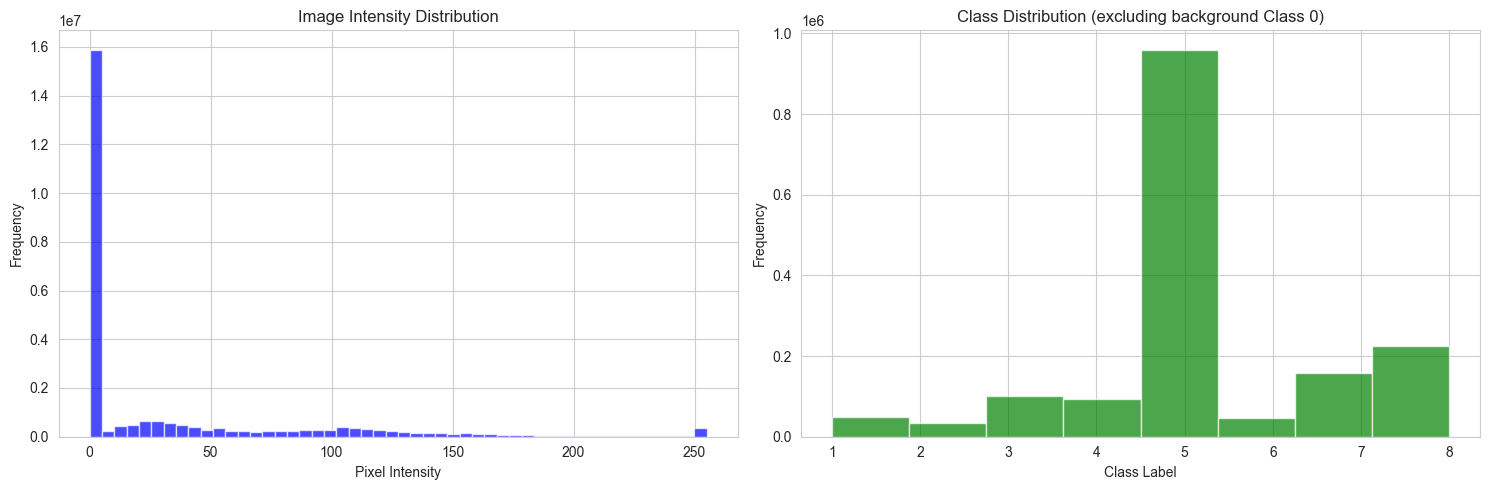

In [12]:
# Intensity Distribution
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Sample images for intensity analysis
img_intensity = []
for img_file in image_files[:100]:
    img_arr = np.array(Image.open(img_file)).flatten()
    img_intensity.extend(img_arr)

axs[0].hist(img_intensity, bins=50, alpha=0.7, color='blue')
axs[0].set_title("Image Intensity Distribution")
axs[0].set_xlabel("Pixel Intensity")
axs[0].set_ylabel("Frequency")

# Sample masks for class distribution
mask_values = []
for mask_file in mask_files[:100]:
    mask_arr = np.array(Image.open(mask_file)).flatten()
    # Remove class 0 (background) from the values
    mask_arr = mask_arr[mask_arr != 0]
    mask_values.extend(mask_arr)

axs[1].hist(mask_values, bins=len(all_unique_values)-1, alpha=0.7, color='green')
axs[1].set_title("Class Distribution (excluding background Class 0)")
axs[1].set_xlabel("Class Label")
axs[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()
